In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 32.0 MB/s eta 0:00:00 MB/s eta 0:00:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 34.6 MB/s eta 0:00:001m38.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 33.7 MB/s eta 0:00:0031m40.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 33.5 MB/s eta 0:00:001m40.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 20.0 MB/s eta 0:00:0031m21.2 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
cust_df = pd.read_csv('./Customers.csv')
pro_df = pd.read_csv('./Products.csv')
tx_df = pd.read_csv('./Transactions.csv')

In [3]:
# cust_df.groupby(['Region']).count()
cust_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [4]:
reg = cust_df['Region'].value_counts()
date = cust_df['SignupDate'].value_counts()

<BarContainer object of 4 artists>

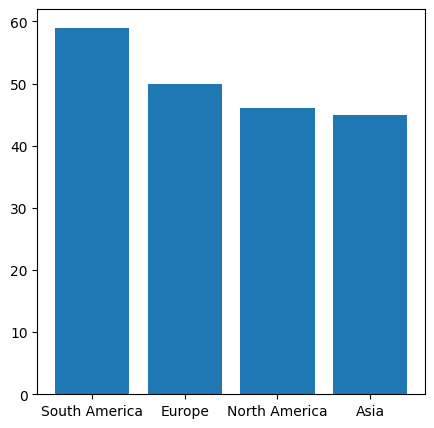

In [5]:
plt.figure(figsize=(5,5))
plt.bar(reg.index, reg)

In [6]:
cust_df['SignupDate'] = pd.to_datetime(cust_df['SignupDate'])

In [7]:
monthly_cid = cust_df.groupby(cust_df['SignupDate'].dt.to_period('M')).agg({'CustomerID': ['count']})
monthly_cid.columns = ['_'.join(col) for col in monthly_cid.columns]

In [8]:
monthly_cid_22 = monthly_cid.filter(like='2022', axis=0)
monthly_cid_23 = monthly_cid.filter(like='2023', axis=0)
monthly_cid_24 = monthly_cid.filter(like='2024', axis=0)
x_22 = [str(i) for i in monthly_cid_22['CustomerID_count'].index]
x_23 = [str(i) for i in monthly_cid_22['CustomerID_count'].index]
x_24 = [str(i) for i in monthly_cid_22['CustomerID_count'].index]

<BarContainer object of 36 artists>

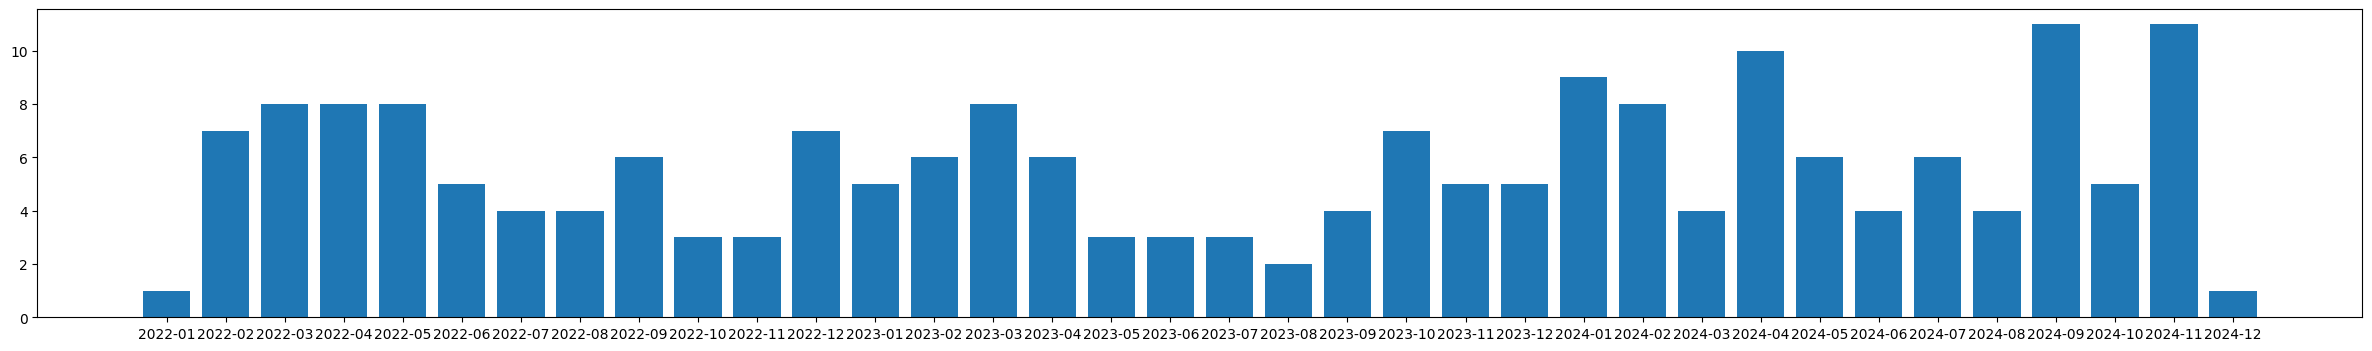

In [210]:
x = [str(i) for i in monthly_cid['CustomerID_count'].index]
plt.figure(figsize=(30,4))
plt.bar(x, monthly_cid['CustomerID_count'].values)

<BarContainer object of 12 artists>

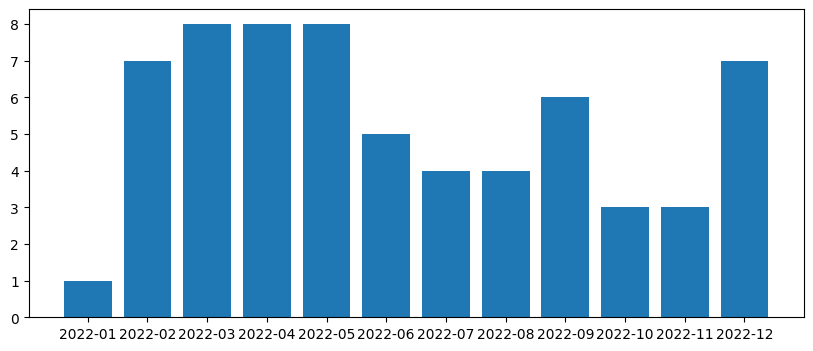

In [9]:
plt.figure(figsize=(10,4))
plt.bar(x_22, monthly_cid_22['CustomerID_count'].values)

<BarContainer object of 12 artists>

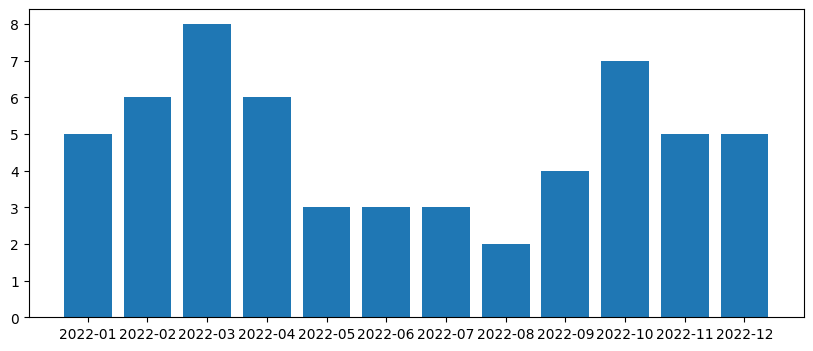

In [198]:
plt.figure(figsize=(10,4))
plt.bar(x_23, monthly_cid_23['CustomerID_count'].values)

<BarContainer object of 12 artists>

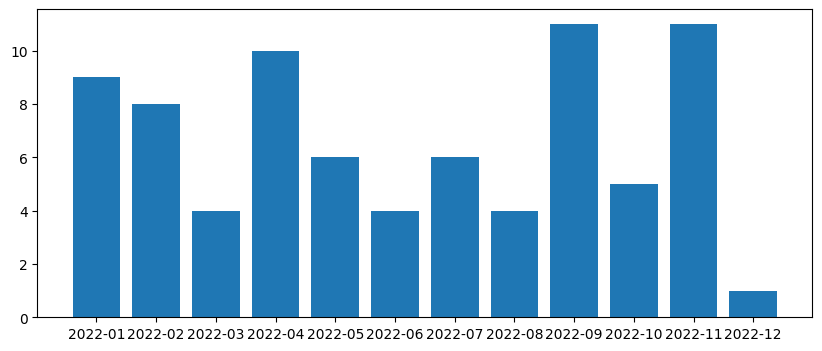

In [200]:
plt.figure(figsize=(10,4))
plt.bar(x_24, monthly_cid_24['CustomerID_count'].values)

In [40]:
delta_index = {i:str(i).split('-')[1] for i in monthly_cid_22.index}
monthly_cid_sum = monthly_cid_22.rename(index=delta_index)

In [46]:
monthly_cid_sum = monthly_cid_sum + monthly_cid_23.values + monthly_cid_24.values

<BarContainer object of 12 artists>

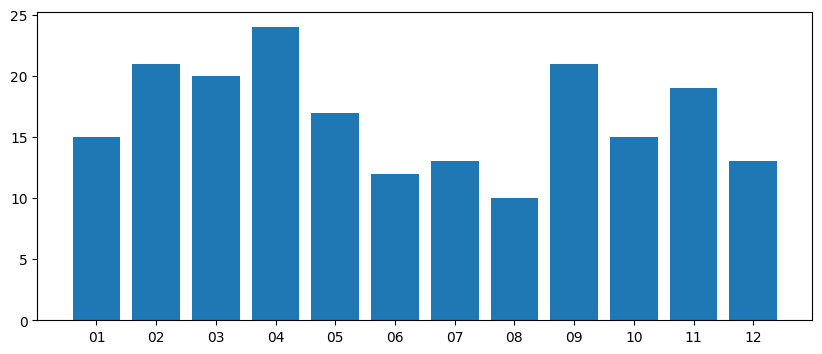

In [48]:
plt.figure(figsize=(10,4))
plt.bar(monthly_cid_sum.index, monthly_cid_sum['CustomerID_count'])

In [52]:
cust_tx = tx_df.groupby(['CustomerID']).agg({'TotalValue': 'sum'})

In [53]:
cust_tx.min(), cust_tx.max() , cust_tx.mean()

(TotalValue    82.36
 dtype: float64,
 TotalValue    10673.87
 dtype: float64,
 TotalValue    3467.314372
 dtype: float64)

In [55]:
pro_df

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [60]:
pro_tx = pd.merge(tx_df[['ProductID', 'Quantity']], pro_df[['ProductID','Category']], how='left')

In [61]:
pro_tx.groupby(['Category']).agg({'Quantity': 'sum'})

,Quantity
Category,
Books,681
Clothing,590
Electronics,627
Home Decor,639
